# Energy Data Science - Homework #2
Kacper Aleksander 244693EV

Tallinn University of Technology

11th of December, 2024

## Read and understand the data

In [1]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

sns.set_context('paper')
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('train.csv')
df.time = pd.to_datetime(df.time, utc=True)
df.set_index('time', inplace=True)
df

,temp,dwpt,rhum,snow,wdir,wspd,wpgt,pres,price,demand
time,,,,,,,,,,
2021-08-31 21:00:00+00:00,11.2,10.3,94.0,NaN,320.0,7.2,16.7,1012.6,0.09016,0.577
2021-08-31 22:00:00+00:00,10.7,9.6,93.0,NaN,320.0,7.2,13.0,1012.6,0.09251,0.594
2021-08-31 23:00:00+00:00,9.9,9.0,94.0,NaN,320.0,7.2,13.0,1012.2,0.08890,0.685
2021-09-01 00:00:00+00:00,10.0,8.4,90.0,NaN,330.0,7.2,13.0,1011.9,0.08735,1.016
2021-09-01 01:00:00+00:00,9.0,8.1,94.0,NaN,300.0,3.6,13.0,1011.4,0.08688,0.677
...,...,...,...,...,...,...,...,...,...,...
2022-08-17 16:00:00+00:00,26.1,16.1,54.0,NaN,120.0,7.0,13.0,1015.0,0.75008,0.897
2022-08-17 17:00:00+00:00,24.1,16.1,61.0,NaN,100.0,6.0,14.8,1015.0,0.75005,2.796
2022-08-17 18:00:00+00:00,24.1,16.6,63.0,NaN,90.0,4.0,13.0,1015.5,0.74888,0.733


In [3]:
df_test = pd.read_csv('test.csv')
df_test.time = pd.to_datetime(df_test.time, utc=True)
df_test.set_index('time', inplace=True)
df_test

,temp,dwpt,rhum,snow,wdir,wspd,wpgt,pres,price,demand
time,,,,,,,,,,
2022-08-17 21:00:00+00:00,19.1,15.2,78.0,NaN,123.0,5.5,11.1,1016.0,0.50926,0.245
2022-08-17 22:00:00+00:00,18.1,15.2,83.0,NaN,97.0,5.5,13.0,1016.0,0.51134,0.178
2022-08-17 23:00:00+00:00,18.1,15.2,83.0,NaN,95.0,3.7,11.1,1016.0,0.47990,0.203
2022-08-18 00:00:00+00:00,16.7,15.7,94.0,NaN,350.0,0.0,11.1,1016.5,0.42430,0.215
2022-08-18 01:00:00+00:00,17.1,15.1,88.0,NaN,90.0,2.0,9.3,1016.0,0.32401,1.043
...,...,...,...,...,...,...,...,...,...,...
2022-08-24 16:00:00+00:00,27.1,17.0,54.0,NaN,180.0,4.0,11.1,1020.0,0.53494,0.678
2022-08-24 17:00:00+00:00,25.1,17.1,61.0,NaN,220.0,6.0,11.1,1021.0,0.49990,0.457
2022-08-24 18:00:00+00:00,24.9,18.1,66.0,NaN,150.0,4.0,9.3,1020.9,0.43149,0.500


## Clean the data (fill the missing data, if needed)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8424 entries, 2021-08-31 21:00:00+00:00 to 2022-08-17 20:00:00+00:00
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    8424 non-null   float64
 1   dwpt    8424 non-null   float64
 2   rhum    8424 non-null   float64
 3   snow    119 non-null    float64
 4   wdir    8424 non-null   float64
 5   wspd    8424 non-null   float64
 6   wpgt    8424 non-null   float64
 7   pres    8424 non-null   float64
 8   price   8424 non-null   float64
 9   demand  8338 non-null   float64
dtypes: float64(10)
memory usage: 723.9 KB


There are missing data in features snow and demand.

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2022-08-17 21:00:00+00:00 to 2022-08-24 20:00:00+00:00
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    168 non-null    float64
 1   dwpt    168 non-null    float64
 2   rhum    168 non-null    float64
 3   snow    0 non-null      float64
 4   wdir    168 non-null    float64
 5   wspd    168 non-null    float64
 6   wpgt    168 non-null    float64
 7   pres    168 non-null    float64
 8   price   168 non-null    float64
 9   demand  168 non-null    float64
dtypes: float64(10)
memory usage: 14.4 KB


### Snow

In [6]:
arr = df.snow.unique()
arr.sort()
arr

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120., 130., 140., 150., 160., 170., 180., 200., 210., 220.,
        nan])

In [7]:
df.snow.groupby(pd.Grouper(freq='ME')).count()

time
2021-08-31 00:00:00+00:00     0
2021-09-30 00:00:00+00:00     0
2021-10-31 00:00:00+00:00     0
2021-11-30 00:00:00+00:00     7
2021-12-31 00:00:00+00:00    30
2022-01-31 00:00:00+00:00    31
2022-02-28 00:00:00+00:00    28
2022-03-31 00:00:00+00:00    20
2022-04-30 00:00:00+00:00     3
2022-05-31 00:00:00+00:00     0
2022-06-30 00:00:00+00:00     0
2022-07-31 00:00:00+00:00     0
2022-08-31 00:00:00+00:00     0
Freq: ME, Name: snow, dtype: int64

It looks like snow data is missing in warmer months, which is very logical. It can be assumed that NaN is the same as 0.

In [8]:
df.snow = df.snow.fillna(0)

### Demand

In [9]:
demand = df.demand[df.demand.isnull()]
demand.fillna(1, inplace=True)
demand.groupby(pd.Grouper(freq='ME')).count()

time
2021-09-30 00:00:00+00:00    10
2021-10-31 00:00:00+00:00    11
2021-11-30 00:00:00+00:00    10
2021-12-31 00:00:00+00:00    10
2022-01-31 00:00:00+00:00    11
2022-02-28 00:00:00+00:00     2
2022-03-31 00:00:00+00:00    10
2022-04-30 00:00:00+00:00     5
2022-05-31 00:00:00+00:00     6
2022-06-30 00:00:00+00:00     7
2022-07-31 00:00:00+00:00     2
2022-08-31 00:00:00+00:00     2
Freq: ME, Name: demand, dtype: int64

<Axes: xlabel='time', ylabel='demand'>

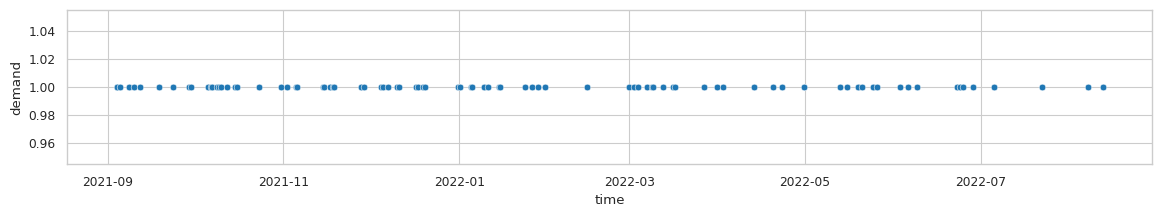

In [10]:
fig, ax = plt.subplots(figsize=(14, 2))

sns.scatterplot(demand)

It can be assumed that demand data is missing completely at random (MCAR). Because there is little of those data missing, I will fill it with 0 values.

In [11]:
df.demand = df.demand.fillna(0)

## Provide a description of the data, including statistics and at least two visuals to gain insights

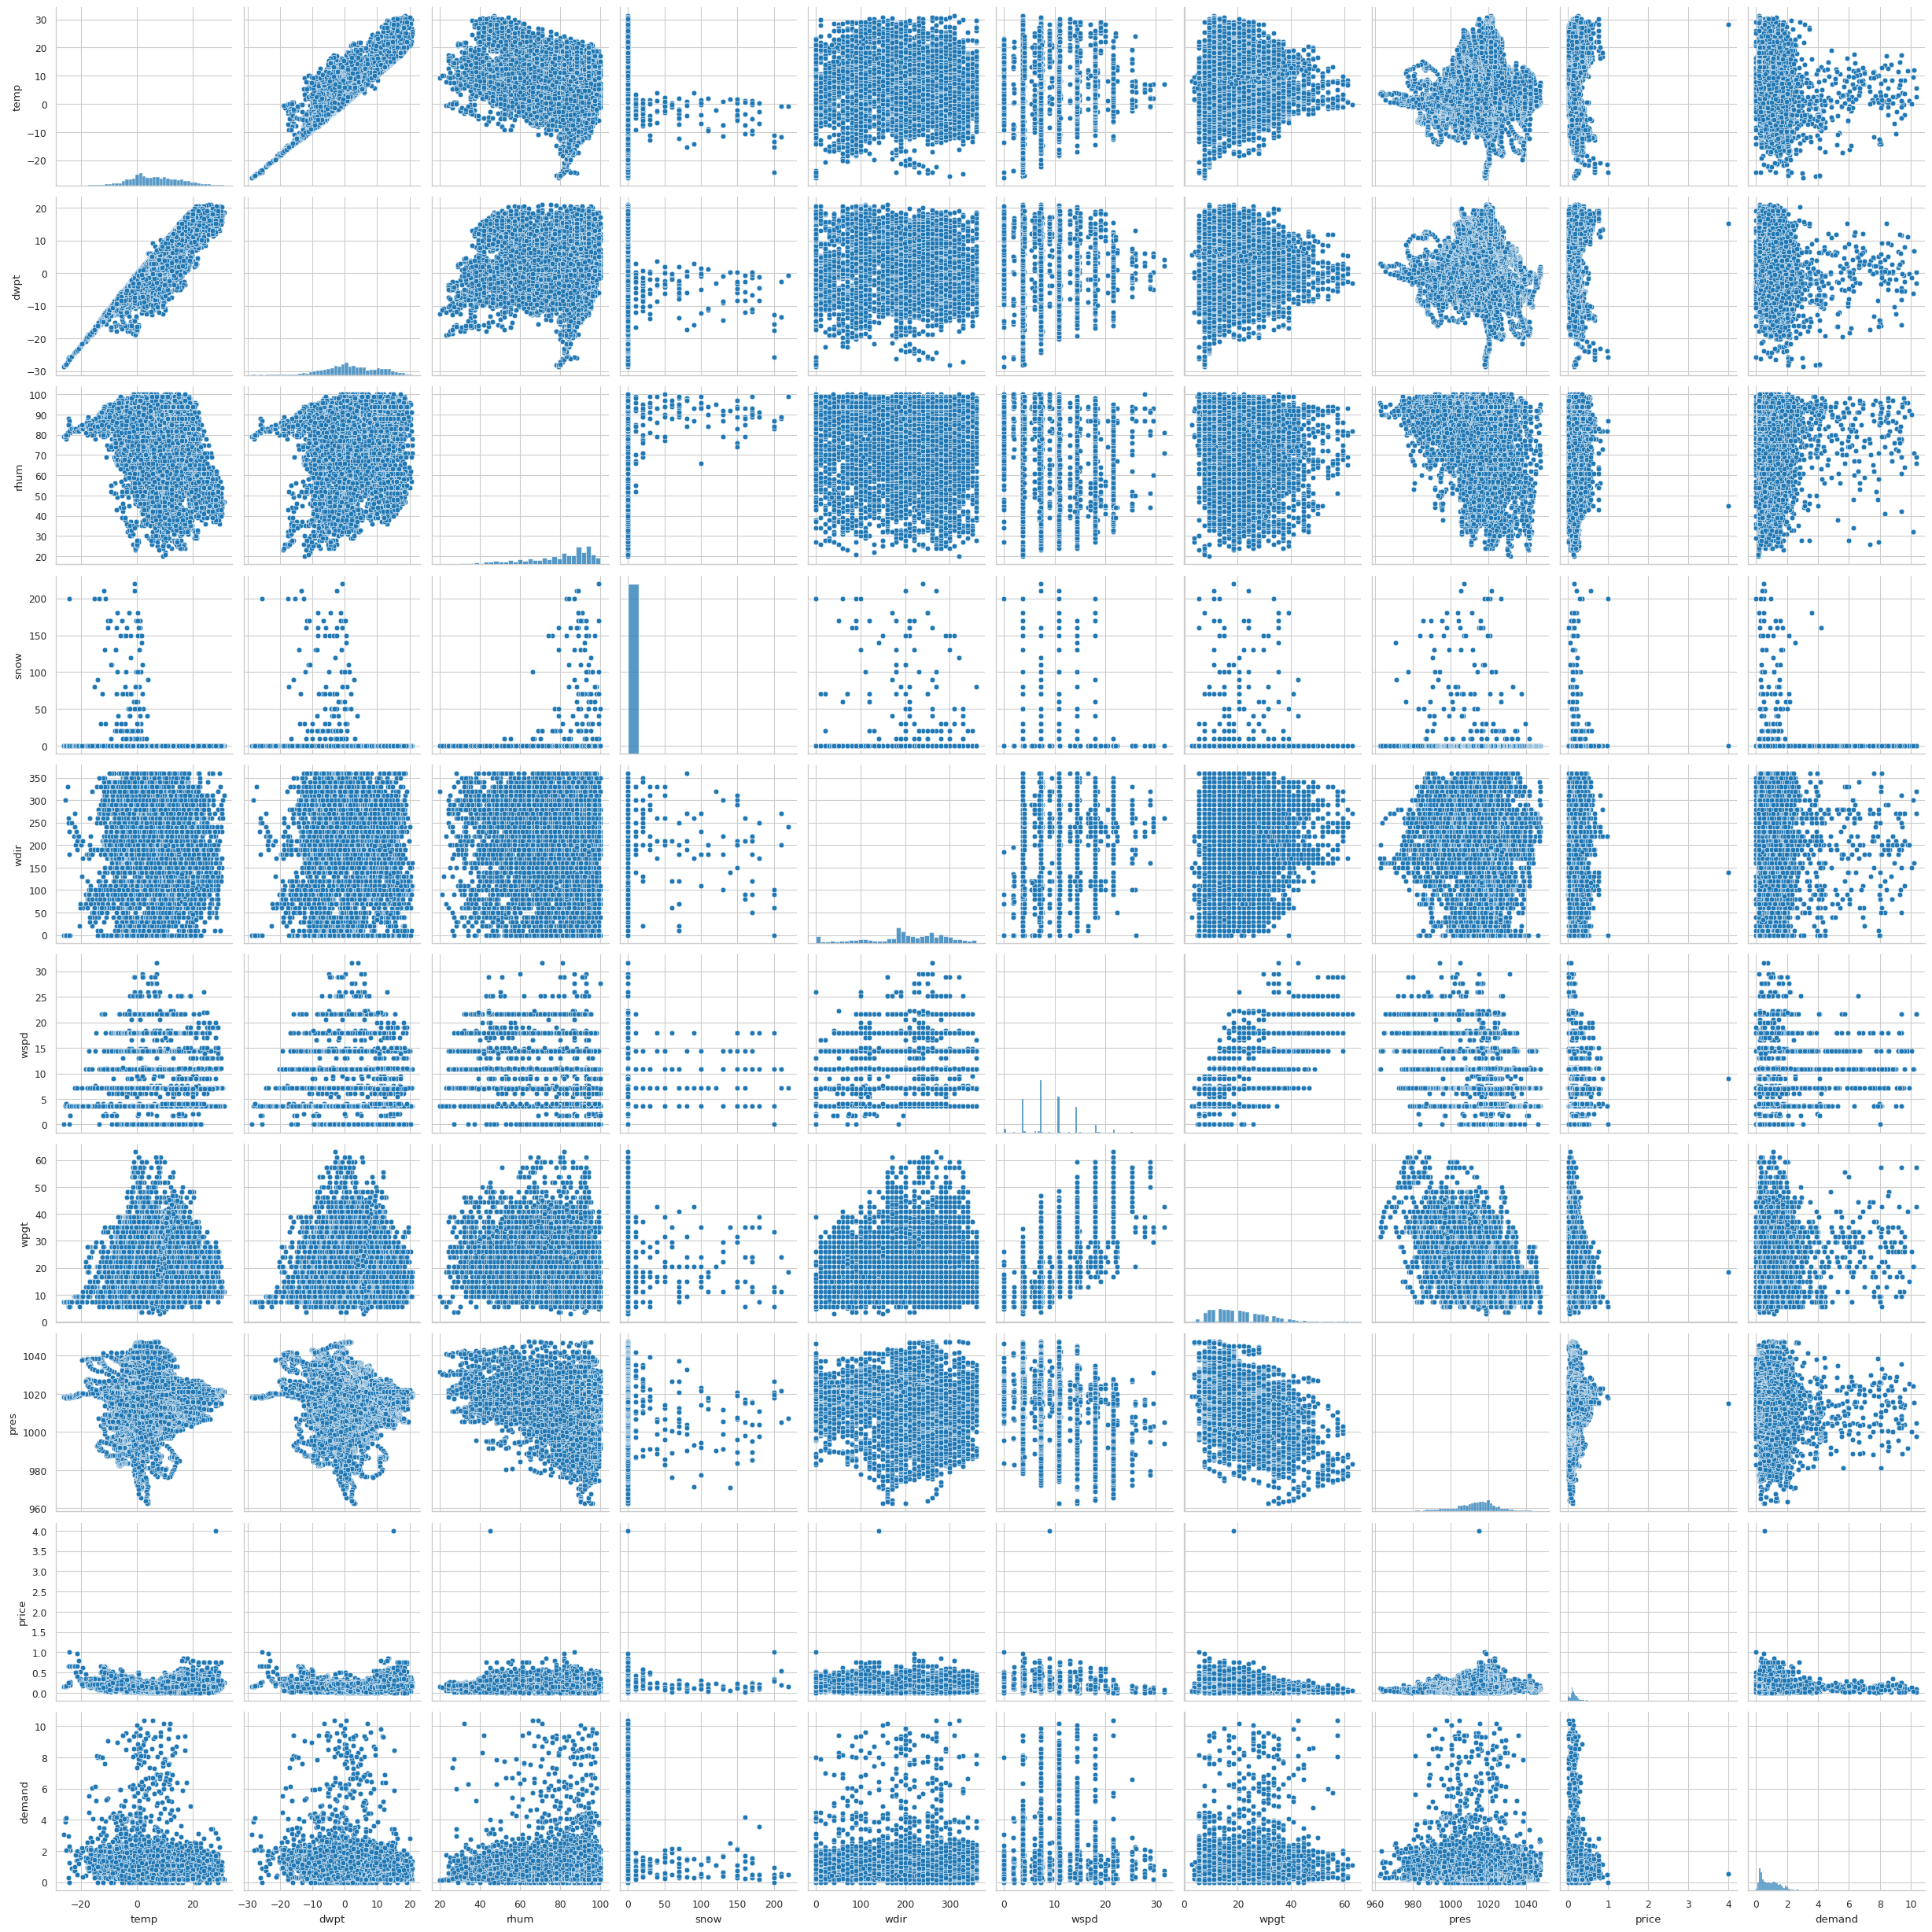

In [12]:
sns.pairplot(df)

<Axes: >

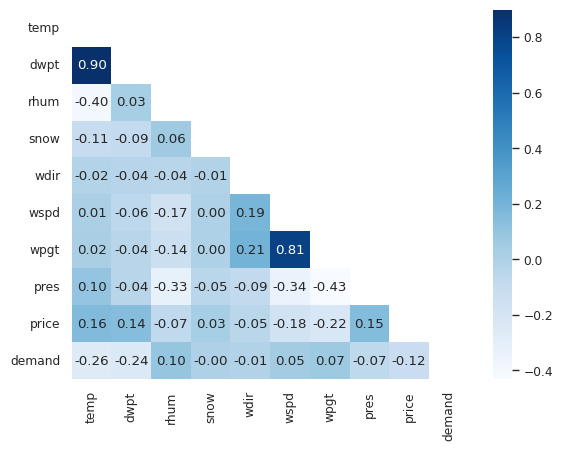

In [13]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set_style('white')

sns.heatmap(corr, mask=mask, annot=True, cmap='Blues', fmt='.2f')

## Analyse distributions of each variable (except demand)

In [14]:
df_before_transformations = df.copy()

In [15]:
df_before_transformations.head()

,temp,dwpt,rhum,snow,wdir,wspd,wpgt,pres,price,demand
time,,,,,,,,,,
2021-08-31 21:00:00+00:00,11.2,10.3,94.0,0.0,320.0,7.2,16.7,1012.6,0.09016,0.577
2021-08-31 22:00:00+00:00,10.7,9.6,93.0,0.0,320.0,7.2,13.0,1012.6,0.09251,0.594
2021-08-31 23:00:00+00:00,9.9,9.0,94.0,0.0,320.0,7.2,13.0,1012.2,0.08890,0.685
2021-09-01 00:00:00+00:00,10.0,8.4,90.0,0.0,330.0,7.2,13.0,1011.9,0.08735,1.016
2021-09-01 01:00:00+00:00,9.0,8.1,94.0,0.0,300.0,3.6,13.0,1011.4,0.08688,0.677


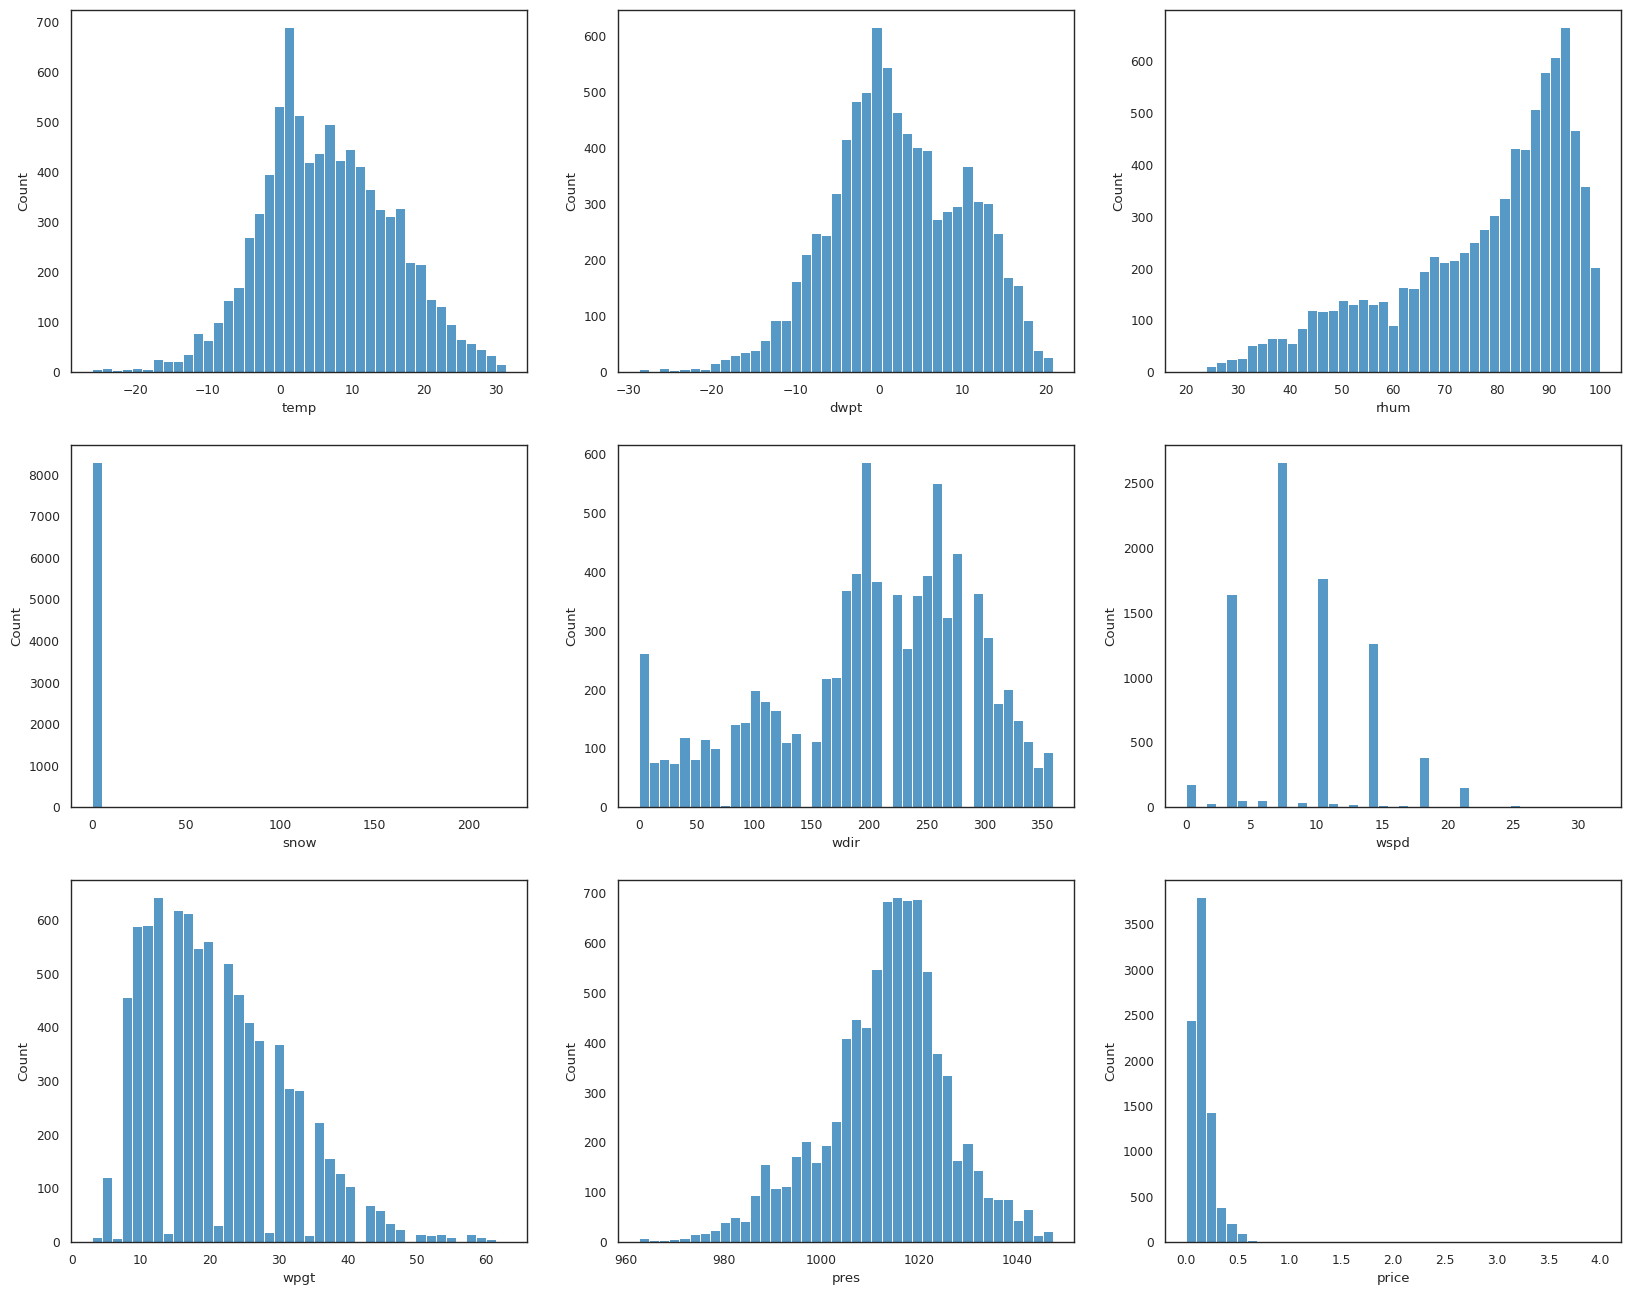

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(20, 16))

for i in range(len(df.columns)-1):
    sns.histplot(df[df.columns[i]], ax=axes[int(np.floor(i/3))][int(i-np.floor(i/3)*3)], bins=41)

### Apply any relevant transformation

In [17]:
from sklearn.preprocessing import StandardScaler
df = df_before_transformations.copy()

df.price = np.log(df.price)
df.drop('demand', axis=1, inplace=True)

scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df)
df = df.join(df_before_transformations.demand)

df.head(5)

,temp,dwpt,rhum,snow,wdir,wspd,wpgt,pres,price,demand
time,,,,,,,,,,
2021-08-31 21:00:00+00:00,0.525602,1.002342,0.961513,-0.09309,1.333322,-0.402005,-0.423038,-0.041603,-0.370066,0.577
2021-08-31 22:00:00+00:00,0.470442,0.915415,0.904310,-0.09309,1.333322,-0.402005,-0.792933,-0.041603,-0.338573,0.594
2021-08-31 23:00:00+00:00,0.382185,0.840907,0.961513,-0.09309,1.333322,-0.402005,-0.792933,-0.073116,-0.387292,0.685
2021-09-01 00:00:00+00:00,0.393217,0.766399,0.732702,-0.09309,1.447170,-0.402005,-0.792933,-0.096751,-0.408820,1.016
2021-09-01 01:00:00+00:00,0.282896,0.729144,0.961513,-0.09309,1.105624,-1.150726,-0.792933,-0.136143,-0.415424,0.677


In [18]:
df_test.price = np.log(df_test.price)
df_test_demand = df_test.demand
df_test.drop('demand', axis=1, inplace=True)
df_test[df_test.columns] = scaler.transform(df_test)
df_test = df_test.join(df_test_demand)

df_test.head(5)

,temp,dwpt,rhum,snow,wdir,wspd,wpgt,pres,price,demand
time,,,,,,,,,,
2022-08-17 21:00:00+00:00,1.397139,1.610827,0.046270,NaN,-0.909500,-0.755568,-0.982879,0.226262,1.749055,0.245
2022-08-17 22:00:00+00:00,1.286818,1.610827,0.332284,NaN,-1.205507,-0.755568,-0.792933,0.226262,1.754044,0.178
2022-08-17 23:00:00+00:00,1.286818,1.610827,0.332284,NaN,-1.228276,-1.129929,-0.982879,0.226262,1.676375,0.203
2022-08-18 00:00:00+00:00,1.132369,1.672918,0.961513,NaN,1.674868,-1.899448,-0.982879,0.265653,1.525661,0.215
2022-08-18 01:00:00+00:00,1.176497,1.598409,0.618297,NaN,-1.285201,-1.483492,-1.162828,0.226262,1.195602,1.043


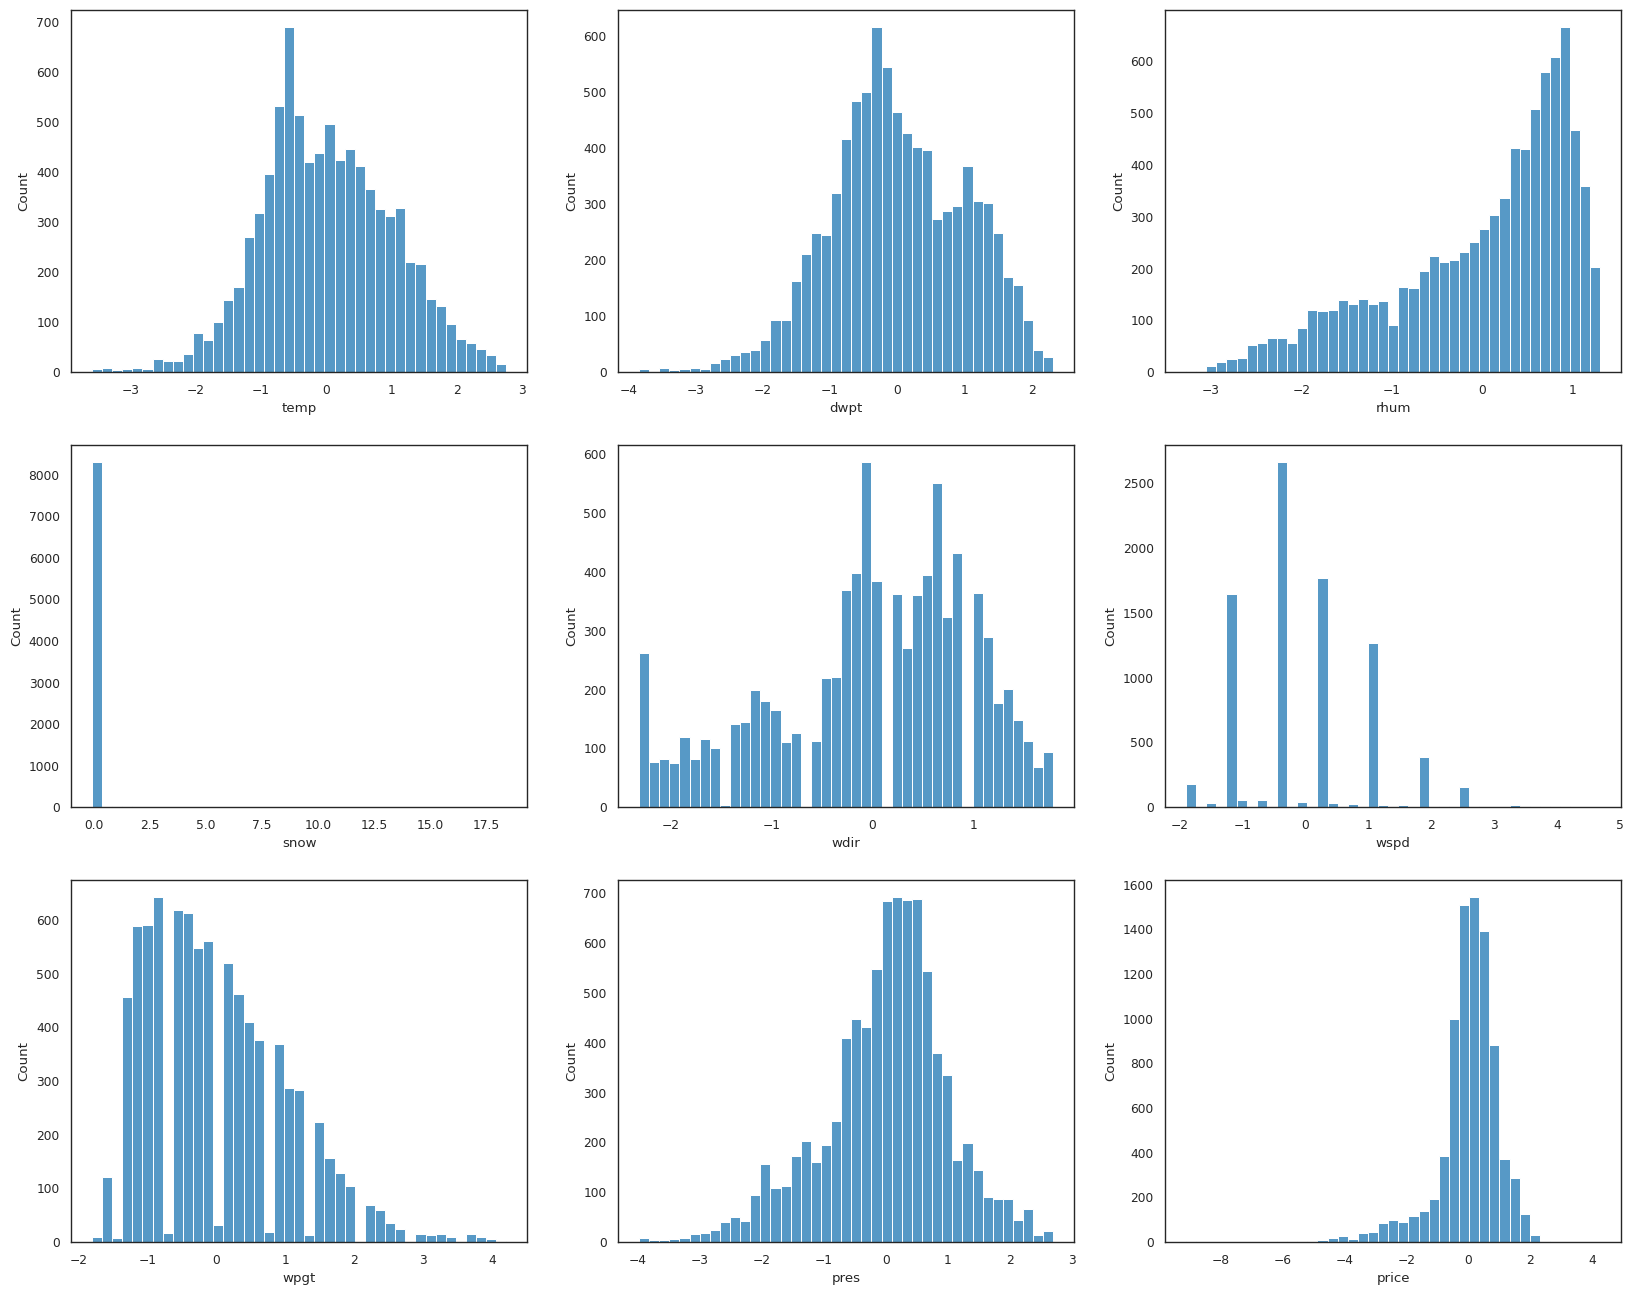

In [19]:
fig, axes = plt.subplots(3, 3, figsize=(20, 16))

for i in range(len(df.columns)-1):
    sns.histplot(df[df.columns[i]], ax=axes[int(np.floor(i/3))][int(i-np.floor(i/3)*3)], bins=41)

## Design one new feature (using only available features)

In [20]:
df['hour'] = df.index.hour

In [21]:
df['dayofweek'] = df.index.dayofweek+1

In [22]:
def is_weekend(dayofweek):
    if dayofweek > 5:
        return 1
    return 0

df['isweekend'] = df.index.dayofweek+1
df.isweekend = df.isweekend.apply(is_weekend)

In [23]:
df.head(0)

,temp,dwpt,rhum,snow,wdir,wspd,wpgt,pres,price,demand,hour,dayofweek,isweekend
time,,,,,,,,,,,,,


<Axes: >

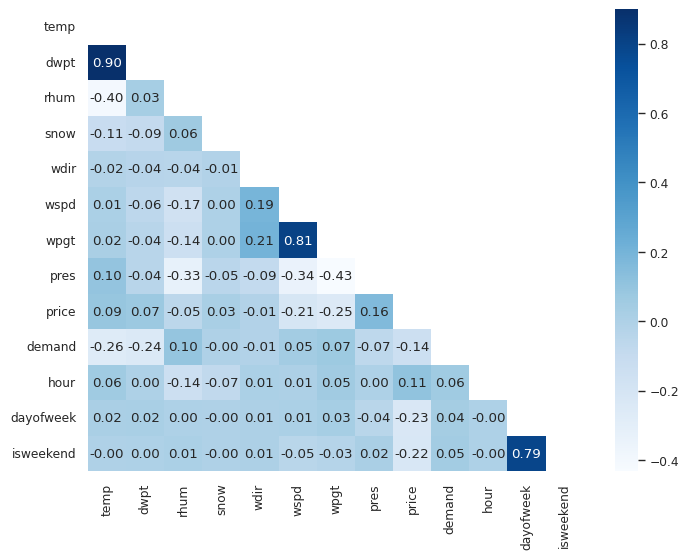

In [24]:
plt.subplots(figsize=(8, 6))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set_style('white')

sns.heatmap(corr, mask=mask, annot=True, cmap='Blues', fmt='.2f')

<Axes: xlabel='hour', ylabel='demand'>

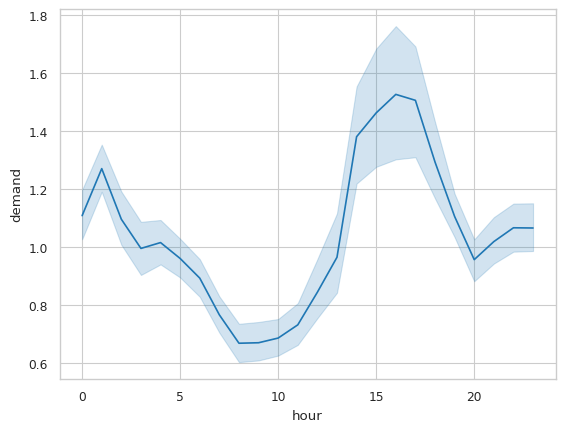

In [25]:
sns.set_style('whitegrid')
sns.lineplot(df, x='hour', y='demand')

<Axes: xlabel='dayofweek', ylabel='demand'>

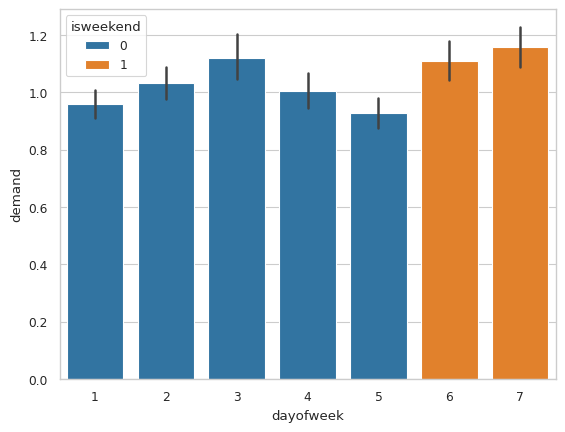

In [26]:
sns.barplot(df, x='dayofweek', y='demand', hue='isweekend')

There is daily seasonality.

## Rank features by relevance

Most important features are:
1. temp
2. rhum
3. price

### Explain the rationale behind your ranking

The features ranking below is based on correlations between features and demand, and on correlations between the features themselves.

dwpt, although it is strongly correlated with demand, is not as important because it's strongly correlated with temp, which I already included.

# Modelling

## Stationarizing the data

## Augmented Dickey-Fuller test

In [27]:
from statsmodels.tsa.stattools import adfuller
adfuller(df.demand)[1]

8.139504071179076e-21

P-value is very small, so demand is considered to be stationary.

## ACF and PACF plots

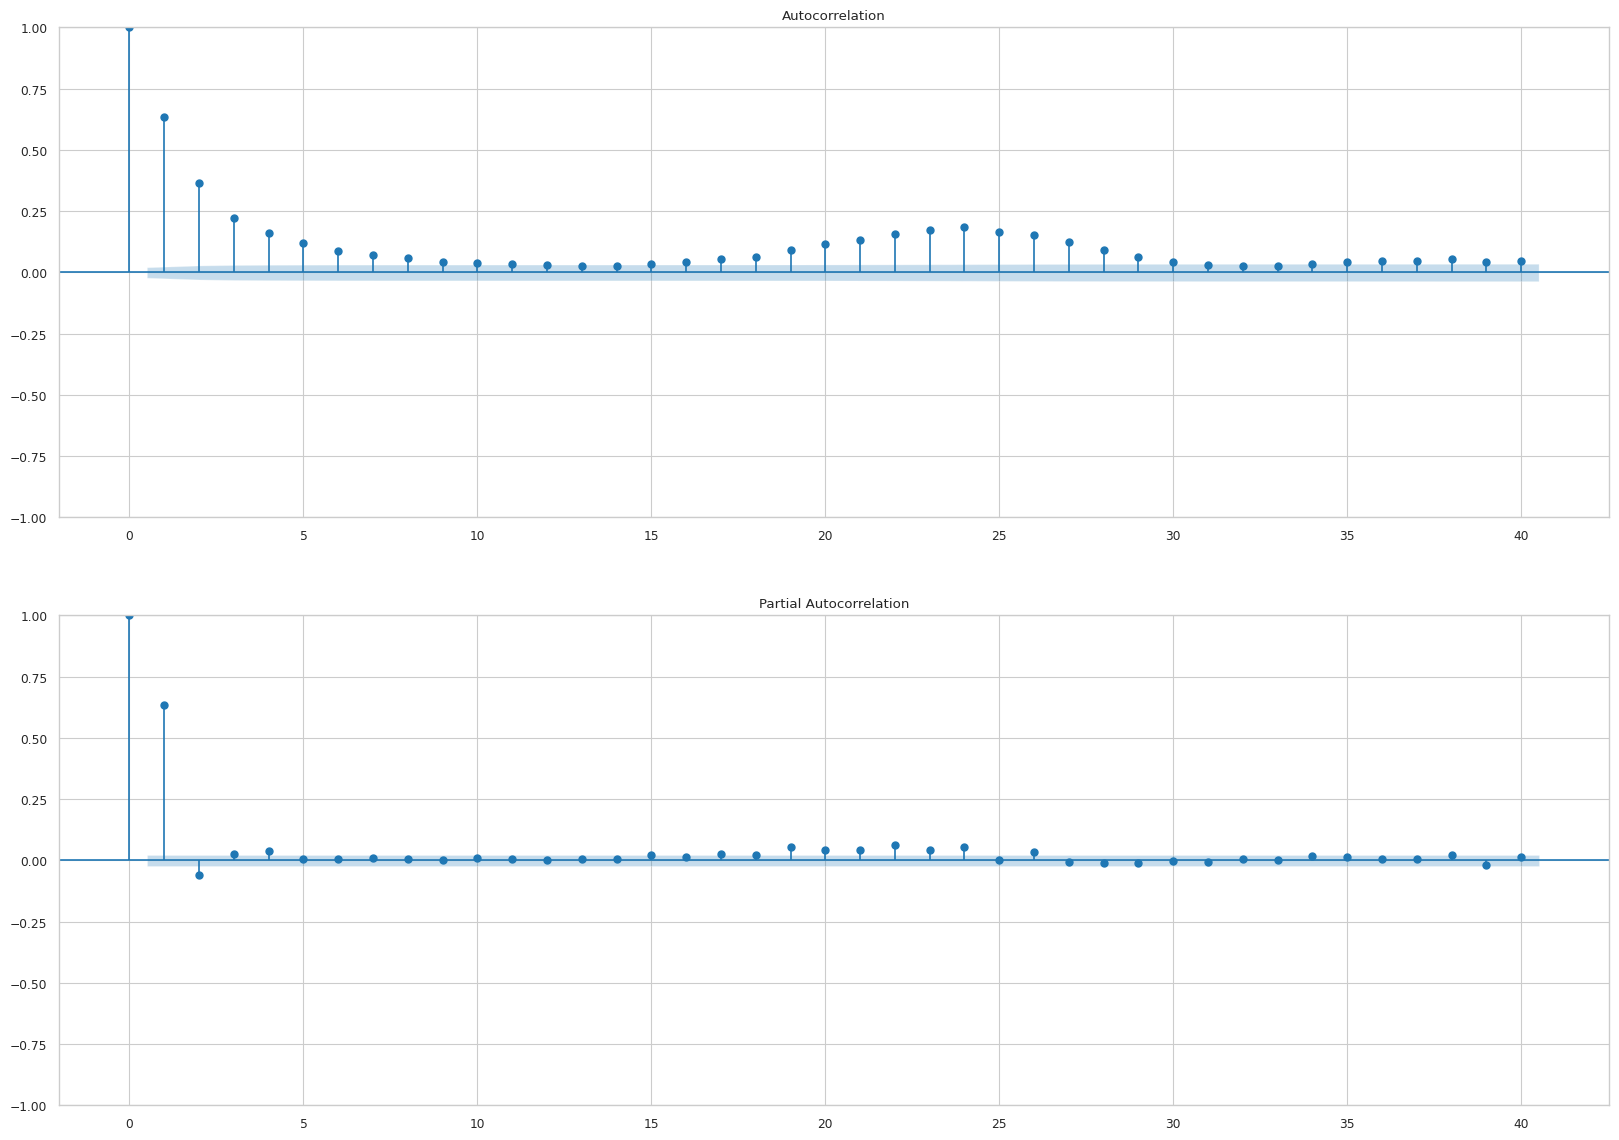

In [28]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig, (ax1, ax2) = plt.subplots(2, 1)

plot_acf(df.demand, ax=ax1)
plot_pacf(df.demand, ax=ax2)
fig.set_size_inches(20, 14)

It seems like only the 1st and 2nd lag might be relevant. Let's try auto ARIMA.

## SARIMA model

Training data starts from 2022-07 to shorten training time

In [29]:
df.head(3)

,temp,dwpt,rhum,snow,wdir,wspd,wpgt,pres,price,demand,hour,dayofweek,isweekend
time,,,,,,,,,,,,,
2021-08-31 21:00:00+00:00,0.525602,1.002342,0.961513,-0.09309,1.333322,-0.402005,-0.423038,-0.041603,-0.370066,0.577,21,2,0
2021-08-31 22:00:00+00:00,0.470442,0.915415,0.904310,-0.09309,1.333322,-0.402005,-0.792933,-0.041603,-0.338573,0.594,22,2,0
2021-08-31 23:00:00+00:00,0.382185,0.840907,0.961513,-0.09309,1.333322,-0.402005,-0.792933,-0.073116,-0.387292,0.685,23,2,0


In [30]:
df = df.loc['2022-07':]

In [31]:
from pmdarima import auto_arima
model_sarima = auto_arima(y=df.demand, m=24)

In [32]:
model_sarima

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(2, 0, 0, 24),
      suppress_warnings=True)

In [33]:
results_sarima = model_sarima.predict(n_periods=24*7)

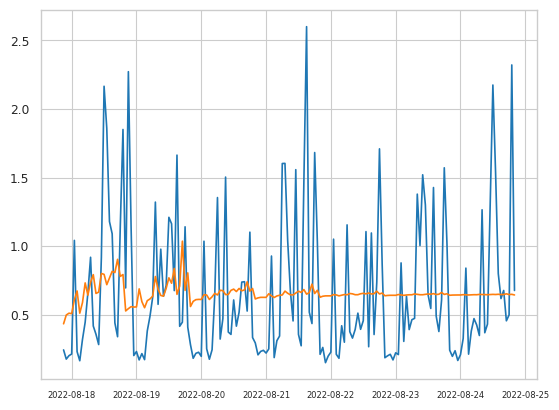

In [34]:
plt.xticks(fontsize=6)
plt.plot(df_test.demand)
plt.plot(results_sarima)

In [35]:
print(f'Mean absolute error: {mean_absolute_error(df_test.demand, results_sarima)*100:.2f}%')

Mean absolute error: 40.48%


## SARIMAX (with exogenous variables)

In [36]:
model_sarimax = auto_arima(y=df.demand, X=df[['temp', 'rhum', 'price']])

In [37]:
model_sarimax

ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True)

In [38]:
results_sarimax = model_sarimax.predict(n_periods=24*7, X=df_test[['temp', 'rhum', 'price']])

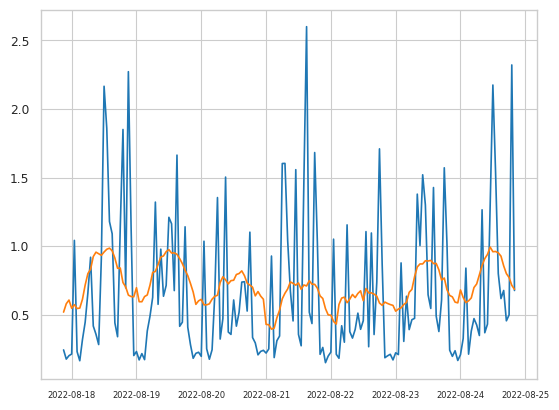

In [39]:
plt.xticks(fontsize=6)
plt.plot(df_test.demand)
plt.plot(results_sarimax)

In [40]:
print(f'Mean absolute error: {mean_absolute_error(df_test.demand, results_sarimax)*100:.2f}%')

Mean absolute error: 40.06%


# Forecast